In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import scipy.io.wavfile
import torch
from fastai.vision import *
from fastai.metrics import error_rate

import IPython.display as ipd
from tqdm import tqdm_notebook

a

In [5]:
import re
pat = re.compile(r'.*/(Female|Male)_[\w\d]+\.jpg')


In [6]:
from pathlib import Path
import numpy as np

path_img = "mfcc" 
fnames = list(Path(path_img).rglob('*.jpg')) + list(Path(path_img).rglob('*.jpeg')) + list(Path(path_img).rglob('*.png'))
np.random.seed(42)
np.random.shuffle(fnames)
fnames[:5]


[Path('mfcc/Male_28540861_mfcc.jpg'),
 Path('mfcc/Male_Dat_bvi_01_2_mfcc.jpg'),
 Path('mfcc/Male_Nam_GEEN_04_2_mfcc.jpg'),
 Path('mfcc/Female_25261229_mfcc.jpg'),
 Path('mfcc/Male_34956768_mfcc.jpg')]

['Female', 'Male']


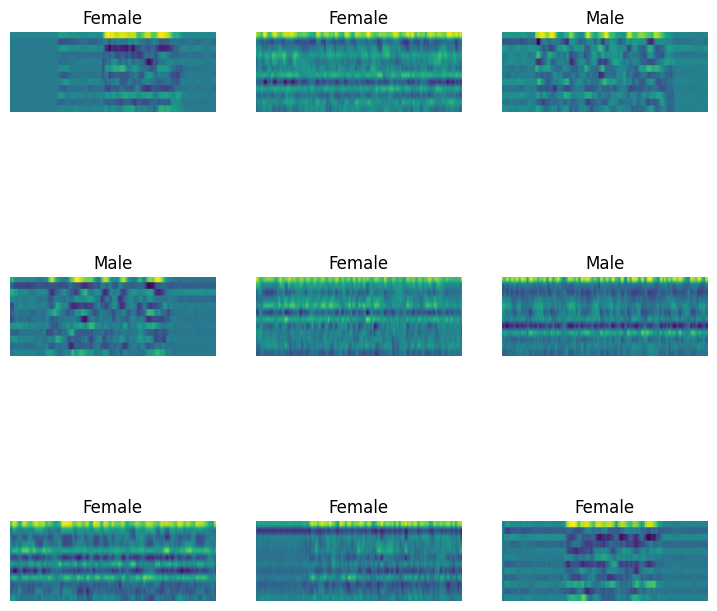

In [7]:
from fastai.vision.all import *
# Tạo DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=RegexLabeller(pat)
)

# Tạo DataLoaders
dls = dblock.dataloaders(path_img, bs=64)


# Hiển thị batch và classes
dls.show_batch()
print(dls.vocab)



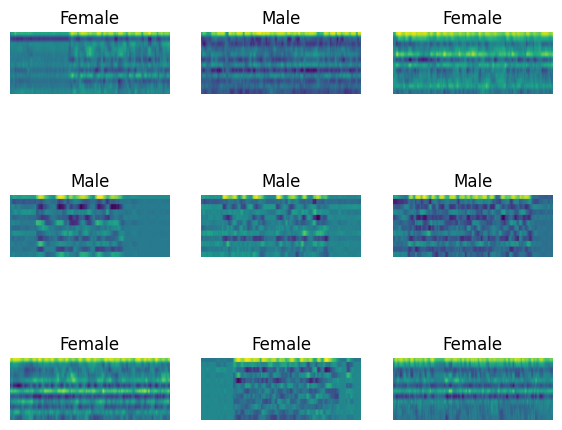

In [8]:
# Replace the old show_batch code with the following
dls.show_batch(nrows=3, ncols=3, figsize=(7,6))


In [9]:
print(dls.vocab)
print(len(dls.vocab), dls.c)


['Female', 'Male']
2 2


In [10]:
learn = cnn_learner(dls, models.resnet34, metrics=error_rate)

In [12]:
torch.cuda.is_available()

False

SuggestedLRs(valley=0.0012022644514217973)

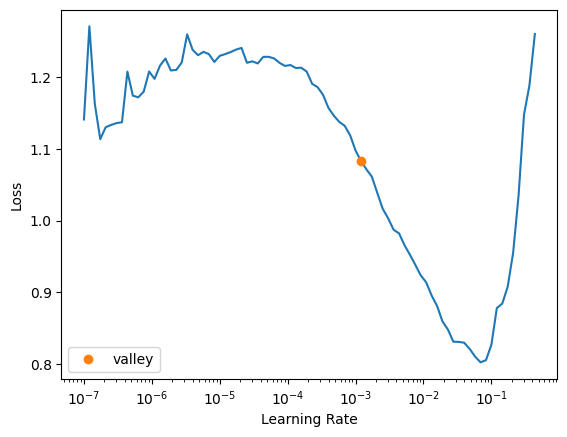

In [13]:
learn.lr_find()

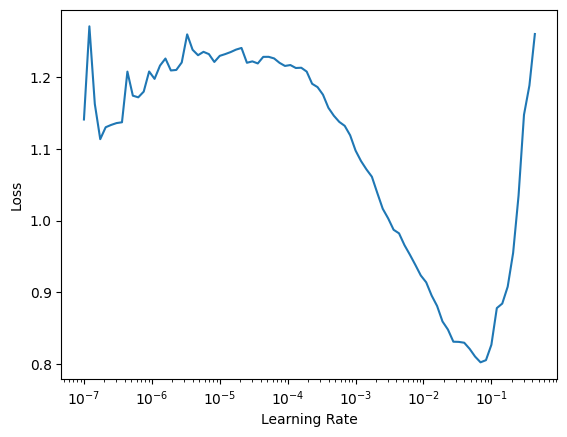

In [14]:
# Plot the learning rate finder graph
learn.recorder.plot_lr_find()

In [15]:
learn.fit_one_cycle(2, 2e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.530483,0.256128,0.105048,16:12
1,0.290859,0.145328,0.053206,16:56


In [16]:
learn.export('mfcc_step1.pkl')

In [17]:
learn.unfreeze()

In [18]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.313859,0.112243,0.039563,27:45


In [19]:
learn.export('mfcc_step2.pkl')